# NBA Player Performance Exploratory Data Analysis


The National Basketball Association is filled prospects and veterans of varying ages. This data analysis will highlight the relationship between age and skill while examining how much age factors into the performance of an individual in the league.

## Importing Python Libraries and Loading Data

Firstly, loading in data, indexed by player name, and examining the first 5 rows to see how the data looks like.

In [151]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression as linreg

NBA = pd.read_csv('/kaggle/input/nba17-18/nba.csv',index_col=1)
NBA.head() # First five rows



,Rk,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,
Alex Abrines\abrinal01,1,SG,24,OKC,75,1134,9.0,0.567,0.759,0.158,...,NaN,1.3,1.0,2.2,0.094,NaN,-0.5,-1.7,-2.2,-0.1
Quincy Acy\acyqu01,2,PF,27,BRK,70,1359,8.2,0.525,0.800,0.164,...,NaN,-0.1,1.1,1.0,0.036,NaN,-2.0,-0.2,-2.2,-0.1
Steven Adams\adamsst01,3,C,24,OKC,76,2487,20.6,0.630,0.003,0.402,...,NaN,6.7,3.0,9.7,0.187,NaN,2.2,1.1,3.3,3.3
Bam Adebayo\adebaba01,4,C,20,MIA,69,1368,15.7,0.570,0.021,0.526,...,NaN,2.3,1.9,4.2,0.148,NaN,-1.6,1.8,0.2,0.8
Arron Afflalo\afflaar01,5,SG,32,ORL,53,682,5.8,0.516,0.432,0.160,...,NaN,-0.1,0.2,0.1,0.009,NaN,-4.1,-1.8,-5.8,-0.7


*For the purpose of this analysis, the only columns that we want are:
* Player's Age, *(Age)*
* Number of Games Played *(G)* 
* Minutes Played *(MP)*
* Player Efficiency Rating *(PER)*
* True Shooting Percentage *(TS%)*

Besides the name of the player, the rest of the columns will be dropped, and any columns with missing data values will also be dropped.

In [152]:
nba_temp = NBA.loc[:,  ['Age', 'G', 'MP','PER','TS%']]
nba = nba_temp.dropna(axis=0)
nba = nba[~nba.index.duplicated()]
nba.head()

,Age,G,MP,PER,TS%
Player,,,,,
Alex Abrines\abrinal01,24,75,1134,9.0,0.567
Quincy Acy\acyqu01,27,70,1359,8.2,0.525
Steven Adams\adamsst01,24,76,2487,20.6,0.630
Bam Adebayo\adebaba01,20,69,1368,15.7,0.570
Arron Afflalo\afflaar01,32,53,682,5.8,0.516


To make things easier to understand visually, the columns will be renamed to change them out of their abbreviations.

In [153]:
nba =nba.rename(index=str, columns={'G' : '# Games','MP': 'Minutes Played',
                               'PER': 'Player Efficiency Rate'})


# Brief Overview of the Data


In [154]:
print(nba.shape)  # of Rows , # of Columns
nba.describe()

(537, 5)


,Age,# Games,Minutes Played,Player Efficiency Rate,TS%
count,537.000000,537.000000,537.000000,537.000000,537.000000
mean,26.104283,48.605214,1105.862197,12.951769,0.531965
std,4.174854,27.312191,855.195522,8.749476,0.124523
min,19.000000,1.000000,1.000000,-41.100000,0.000000
25%,23.000000,21.000000,253.000000,9.700000,0.500000
50%,25.000000,56.000000,1045.000000,12.800000,0.541000
75%,29.000000,73.000000,1810.000000,16.400000,0.582000
max,41.000000,82.000000,3026.000000,133.800000,1.500000


* In the 2017-18 season, there were approximately 660 players that were active.
* The average NBA player during the 2017-18 season is about 26 years old, which is expected based on previous season age averages.
* It is interesting to note that the oldest player in the league is 41, which is 22 years older than the youngest player!
* The average player is playing 43 games during the season while having a True Shooting % of roughly 0.53 *(Note: A player with a TS% > .60 is considered an "elite player.")  



# Data Visualization

As noticed before, the range of a player's age is vast, but how frequent are these ages?

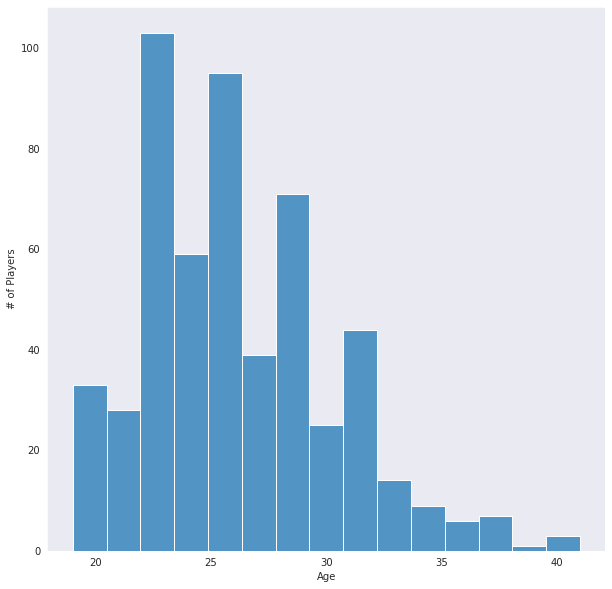

In [155]:
sns.set_style("dark")
plt.figure(figsize=(10,10))
plt.ylabel('# of Players')
sns.histplot(data=nba, x='Age')
plt.show()

The league was, and still is, heavily skewed to the younger ages, but that's to be expected. Teams are often looking young prospects, hoping to draft them during or after their college years.

However, this histogram can only tell us so much, we still want to know if age actually affects performance. Let's start by taking a look at age with respect to the number of games played.

# Age Compared to Minutes Played

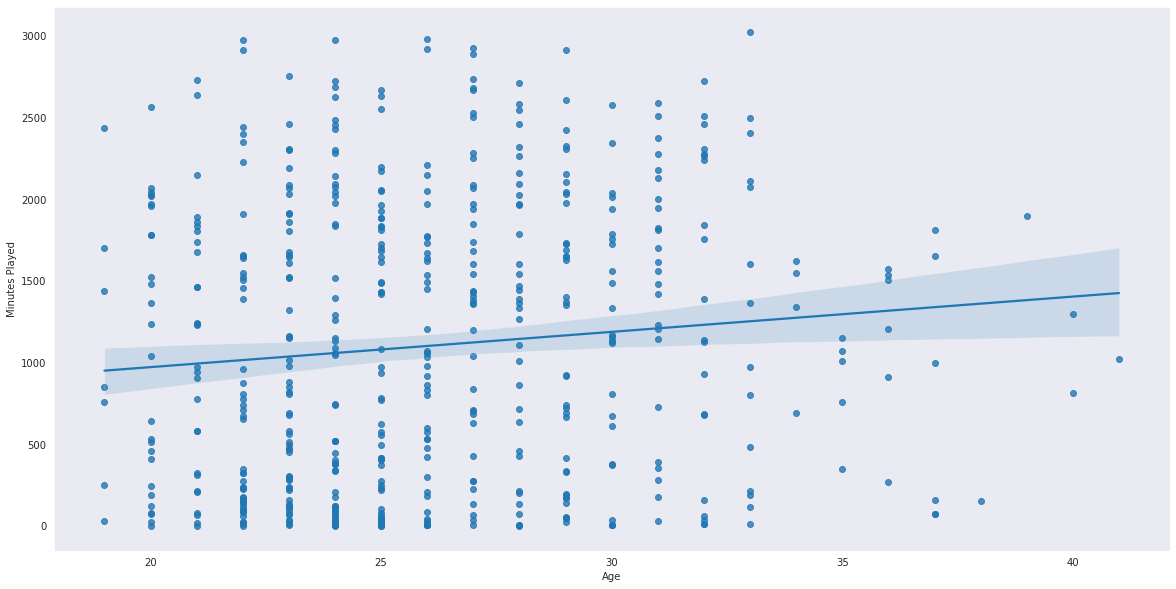

In [156]:
plt.figure(figsize=(20,10))
plt.ylabel('Minutes Played')
plt.xlabel('Age')
sns.regplot(data=nba, x='Age',y='Minutes Played')
plt.show()


The scatterplot above can tell us a few things:
1. Younger players between ages 19-28 are playing more games than older players between ages 28-41
2. The range of minutes played by younger players is overall larger than older players.
3. Overall, older players are playing longer than younger players.

Now, keep in mind that this may not be the best line fit for the scatterplot, however, the graph gives a general idea that Age likely does not impact minutes played in a game. 

Being older may imply more experience, allowing more time on the floor, however there are many young prospects who are playing longer than the veterans.

# Age Compared to Games Played

Now, let's take a look at age with respect to games played.

But before we jump into that comparison, let's take a look at the relationship between games played and minutes played.

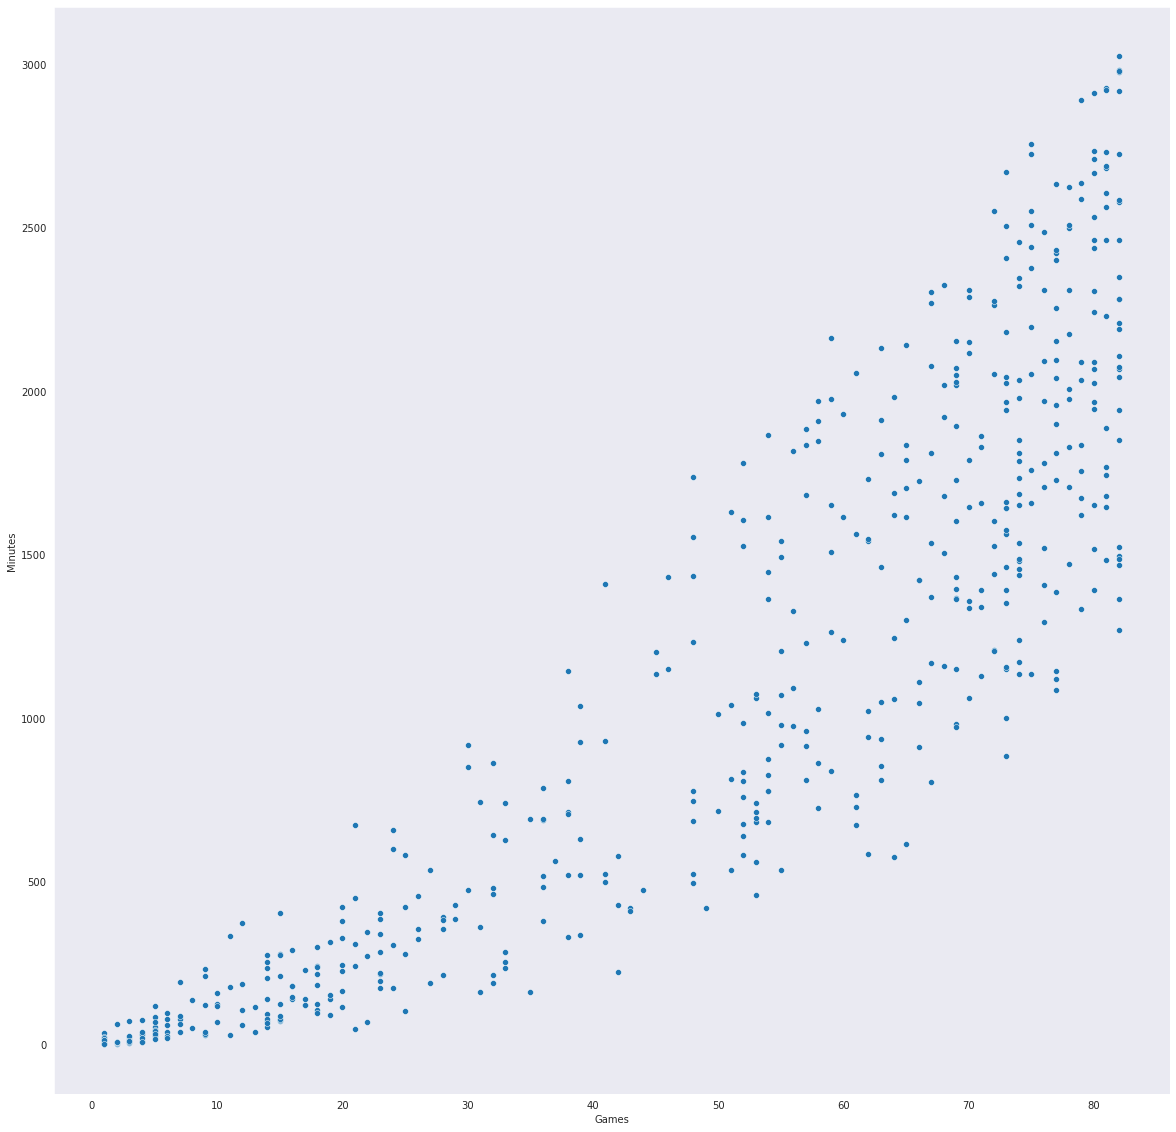

In [157]:
plt.figure(figsize=(20,20))
plt.ylabel('Minutes')
plt.xlabel('Games')
sns.scatterplot(data=nba, x='# Games',y='Minutes Played')
plt.show()

It seems that if a player is playing more games in the season, they are also playing longer on average.

With that being said, let's add in Age in this comparison.

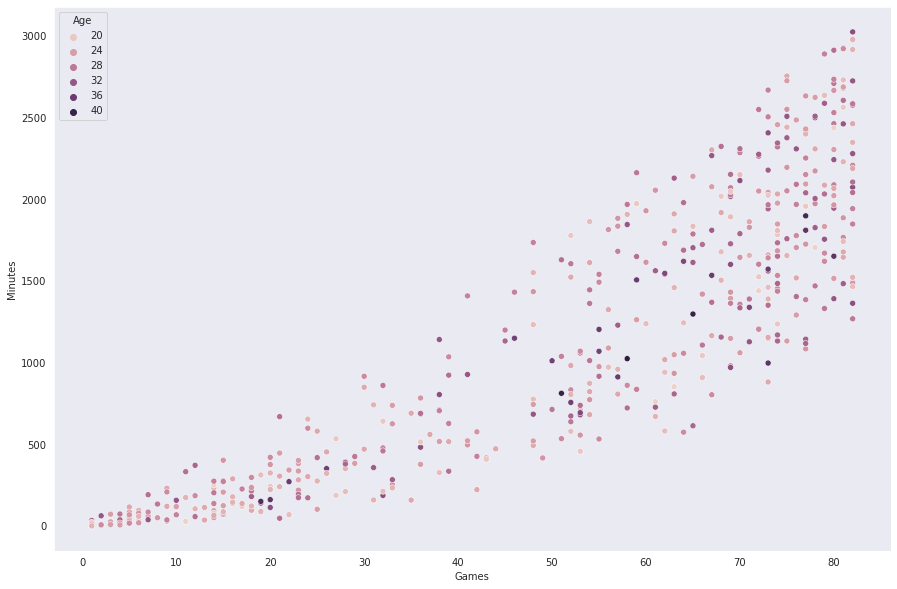

In [158]:
plt.figure(figsize=(15,10))
plt.ylabel('Minutes')
plt.xlabel('Games')
sns.scatterplot(data=nba, x='# Games',y='Minutes Played', hue='Age')
plt.show()

A few traits to note about this scatterplot:
1. This scatterplot confirms our conclusion about the relationship between Age and Minutes Played, as there are older and younger people playing for various amounts of time.
2. The younger *and* older age ranges are scattered all throughout the plot, indicating age likely does not impact the amount of times an individual gets to play.  


So it seems that age is just a number when it comes to performance, right? Perhaps, but so far we have only looked at the quantitative aspects, but what about the actual skill during a game? 

# Age Compared to Player Efficiency Rating

Although there may be players participating in more matches or playing for longer lengths, it does not accurately depict the performance of these individuals.

This is why we will be examining a player's Playing Efficiency Rating (PER) with respect to their age in order to assess the true nature of these scatterplots. 

But what *is* PER? In the words John Hollinger, it allows one to take all of a basketball player's accomplishments (scoring, blocking, steals, etc,) and turns it into a single number. PER is also a per-minute measure, which allows any two arbitrarily picked players to be compared regardless of games or minutes played. 
This is also why we dropped some of the columns earlier, as it made it simpler to compare a cumulative stat such as PER instead of dealing with each individual aspect. 

With PER, we now can analyze performance based on age with a new perspective. 
Let's take a look at the relationship between PER and Minutes Played.



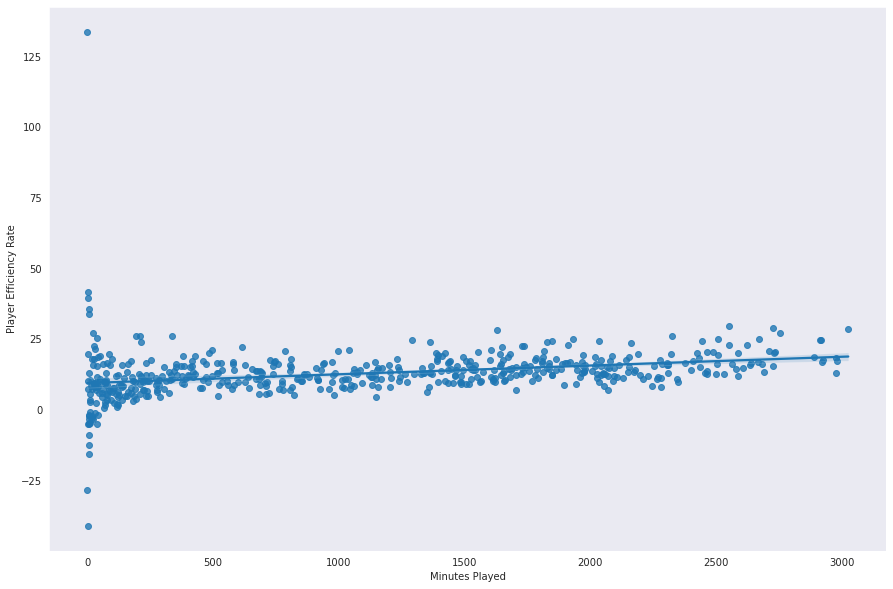

In [159]:
plt.figure(figsize=(15,10))
sns.regplot(data=nba, x='Minutes Played',y='Player Efficiency Rate')
plt.show() 


It seems that on average, if a player is in game for longer, they likely have a higher PER compared to most.

Next, we will compare Games Played with PER

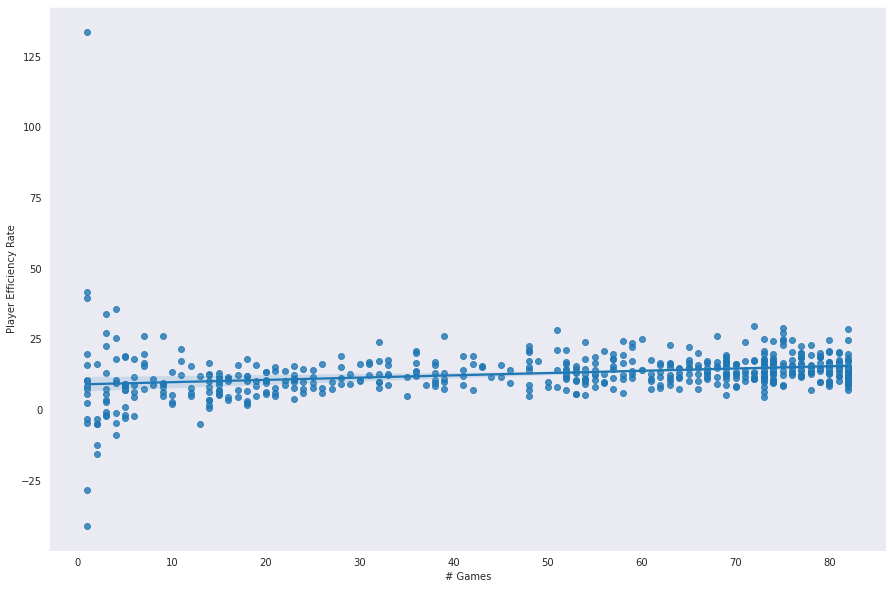

In [160]:
plt.figure(figsize=(15,10))
sns.regplot(data=nba, x='# Games',y='Player Efficiency Rate')
plt.show() 

It also seems that on average, if a player is in more matches, they have a higher PER.

So far, everything seems to add up, PER has a positive relationship with how much a player is involved in a game.

Now, let's start comparing Age to one of these two variables.

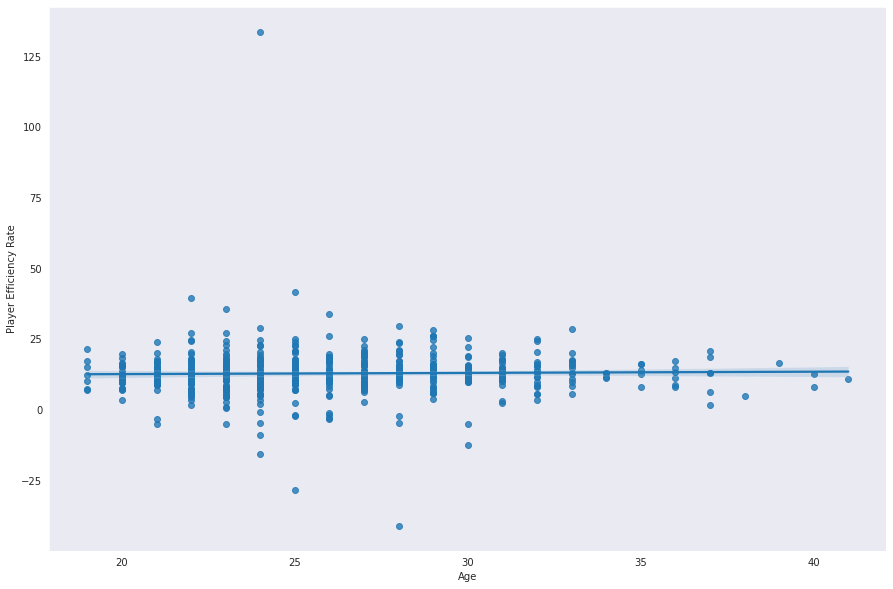

In [161]:
plt.figure(figsize=(15,10))
sns.regplot(data=nba, x='Age',y='Player Efficiency Rate')
plt.show() 

Almost a complete straight line in the regression slope, age has little to no relationship with PER. But what does this mean?

# Conclusion

Despite comparing a multitude of variables against age and using different methods of plotting, age never seems to affect the final results.  Age is not a negative trait to a basketball player, but it also does not seem to be an advantage either. 

Here are some other conclusions one could make based on this analysis:
* These are the results of just a handful of players in one season so it is risky to extrapolate and say this conclusion is concisive for every season of the NBA.
* Being old in the NBA is by comparison. The age ranges, for the most part, were split into younger and older players, but one may redo this analysis and try smaller ranges to potentially yield new insight.
* This analysis is purely based on visual data, it does not give insight to *every* aspect of individual performance such as leadership and being a team player. 

Overall, the analyis was insightful, and gave a new perspective to how good NBA players are, as even they do not let age stop them from being the best.